Используемое устройство: cuda

Примеры создания тензоров:
a: tensor([1., 2.], device='cuda:0')
b: tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
x: tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]], device='cuda:0')
Форма x: torch.Size([2, 3, 4])

Арифметические операции:
Сложение: tensor([[ 6.,  8.],
        [10., 12.]], device='cuda:0')
Вычитание: tensor([[-4., -4.],
        [-4., -4.]], device='cuda:0')
Умножение: tensor([[ 5., 12.],
        [21., 32.]], device='cuda:0')
Деление: tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]], device='cuda:0')

Матричные операции:
Транспонирование: tensor([[1., 3.],
        [2., 4.]], device='cuda:0')
Ошибка в операциях: 1D tensors expected, but got 2D and 1D tensors

Умножение матриц на GPU выполнено успешно
Результирующий тензор: cuda:0, форма: torch.Size([10000, 10000])
Тензор перемещен на cpu

Градиенты:
x.grad: 

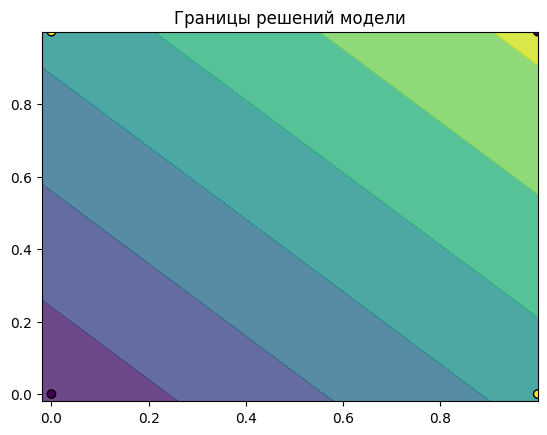

In [ ]:

import torch
import numpy as np
import matplotlib.pyplot as plt

# Проверка доступности CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используемое устройство: {device}\n")




# Синтаксис PyTorch

# Создание тензоров с проверкой типов
try:
    # Создание тензоров разных типов
    a = torch.FloatTensor([1, 2]).to(device)
    b = torch.FloatTensor([[1,2,3], [4,5,6]]).to(device)
    x = torch.FloatTensor(2,3,4).zero_().to(device)
    
    print("Примеры создания тензоров:")
    print("a:", a)
    print("b:", b)
    print("x:", x)
    print("Форма x:", x.shape)
except Exception as e:
    print(f"Ошибка при создании тензоров: {e}")


# Операции с тензорами
try:
    # Арифметические операции
    a = torch.FloatTensor([[1, 2], [3, 4]]).to(device)
    b = torch.FloatTensor([[5, 6], [7, 8]]).to(device)
    
    print("\nАрифметические операции:")
    print("Сложение:", a + b)
    print("Вычитание:", a - b)
    print("Умножение:", a * b)
    print("Деление:", a / b)
    
    # Матричные операции
    print("\nМатричные операции:")
    print("Транспонирование:", a.t())
    print("Скалярное произведение:", a.dot(b.view(-1)))
    print("Матричное умножение:", torch.mm(a, b))
except Exception as e:
    print(f"Ошибка в операциях: {e}")


# Работа с CUDA
try:
    if torch.cuda.is_available():
        # Создание больших тензоров
        a = torch.rand(10000, 10000, device=device)
        b = torch.rand(10000, 10000, device=device)
        
        # Умножение на GPU
        c = torch.mm(a, b)
        print("\nУмножение матриц на GPU выполнено успешно")
        print(f"Результирующий тензор: {c.device}, форма: {c.shape}")
        
        # Перенос на CPU
        c_cpu = c.cpu()
        print(f"Тензор перемещен на {c_cpu.device}")
except Exception as e:
    print(f"Ошибка в работе с CUDA: {e}")


# Автоматическое дифференцирование (Autograd)
try:
    # Современный подход без Variable
    x = torch.randn(3, 1, requires_grad=True, device=device)
    w = torch.randn(3, 3, requires_grad=True, device=device)
    b = torch.randn(3, 1, requires_grad=True, device=device)
    
    # Прямой проход
    y_pred = torch.mm(w, x) + b
    loss = y_pred.sum()
    
    # Обратное распространение
    loss.backward()
    
    print("\nГрадиенты:")
    print("x.grad:", x.grad)
    print("w.grad:", w.grad)
    print("b.grad:", b.grad)
except Exception as e:
    print(f"Ошибка в autograd: {e}")


# Визуализация (дополнительный пример)
def plot_decision_boundary(model, X, y):
    try:
        # Перемещение данных на CPU для визуализации
        X_np = X.cpu().numpy()
        y_np = y.cpu().numpy()
        
        h = 0.02
        x_min, x_max = X_np[:, 0].min()-h, X_np[:, 0].max()+h
        y_min, y_max = X_np[:, 1].min()-h, X_np[:, 1].max()+h
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        
        # Предсказание для сетки
        grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)
        with torch.no_grad():
            Z = model(grid_tensor).cpu().numpy()
        
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, edgecolors='k')
        plt.title("Границы решений модели")
        plt.show()
    except Exception as e:
        print(f"Ошибка визуализации: {e}")

# Пример использования
if __name__ == "__main__":
    # Простая модель
    class SimpleModel(torch.nn.Module):
        def __init__(self):
            super().__init__()
            self.linear = torch.nn.Linear(2, 1)
            self.linear.weight.data.fill_(0.5)
            self.linear.bias.data.fill_(-0.2)
            
        def forward(self, x):
            return torch.sigmoid(self.linear(x))
    
    model = SimpleModel().to(device)
    
    # Тестовые данные
    X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device)
    y = torch.FloatTensor([0,1,1,0]).view(-1,1).to(device)
    
    plot_decision_boundary(model, X, y)